In [30]:
from sympy import *
from IPython.display import display, Math
import numpy as np
init_printing(use_unicode=True)
import plotly.express as px
import plotly.graph_objects as go

In [31]:
from sympy import solve
x, y, sigma, mu, delta, alpha, beta, ro, eta, b, lambd = symbols(
    'x y σ μ δ α β ρ η b λ')
sigma_c = 0.1181
ro_c = 1.31
eta_c = 20.19
alpha_c = 1.636
beta_c = 0.002
delta_c = 0.3743
mu_c = 0.005
b_c = 0

dxdt = sigma + ro*x*y/(eta + y) - mu*x*y - delta*x
dydt = alpha*y*(1-beta*y)-x*y-(b*y)/(1+y)

concrete_params = {ro: ro_c, sigma: sigma_c, eta: eta_c, b: b_c,
                   alpha: alpha_c, beta: beta_c, mu: mu_c, delta: delta_c}
muless_params = dict(concrete_params)
del muless_params[mu]


In [32]:
display(Math('\dfrac{dx}{dt} = ' + latex(dxdt)))
display(Math('\dfrac{dy}{dt} = ' + latex(dydt)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Точки равновесия

### 1

In [33]:
display(Math('x = ' + latex(sigma/delta)))
display(Math('y = 0' )) # Решение не зависит от μ

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
# Остаьные равновесия аналитически не найти. Полином 5 степени.

In [35]:
def get_solutions(cur_mu=concrete_params[mu]):
    params = dict(concrete_params)
    params[mu] = cur_mu
    return solve([dxdt.subs(params), dydt.subs(params)], x,y)

In [36]:
def display_solutions(sols):
    for s in sols:
        display(s)

In [37]:
def display_sol_list(sol_list):
    for cur_mu, sols in sol_list:
        print(f"mu = {cur_mu}")
        display_solutions(sols)
        display("*"*20)

In [38]:
# for s in get_solutions():
#     display(s)

#### Бифуркационная диаграмма

In [39]:
mus = np.linspace(0.002, 0.022, 50)
# mus

In [40]:
from tqdm import tqdm

In [41]:
xs=[]
ys = []
mul = []
solutions_by_mu={}
for cur_mu in tqdm(mus):
    solutions = get_solutions(cur_mu)
    solutions_by_mu[cur_mu]= solutions
    # for s in solutions:
    #     if s[1]!=0:# and s[1].as_real_imag()[1]==0:#real
    #         ys.append(s[1].as_real_imag()[0])
    #         mul.append(cur_mu)
            
    

100%|███████████████████████████████████████████| 50/50 [01:19<00:00,  1.59s/it]


In [42]:
# for cur_mu, sols in list(solutions_by_mu.items()):
#     print(f"mu = {cur_mu}")
#     display_solutions(sols)
#     display("*"*20)

In [43]:
# sols_list = list(solutions_by_mu.items())
# display_sol_list(sols_list[:8])

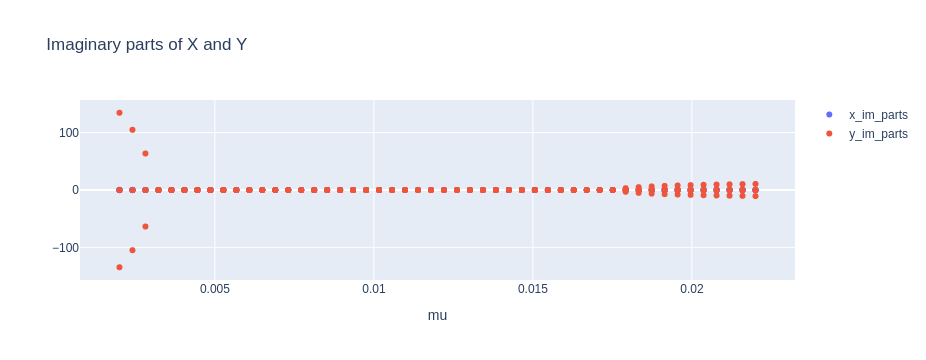

In [44]:
y_im_parts = []
x_im_parts = []
mus_for_im=[]
for cur_mu, sols in list(solutions_by_mu.items()):
    for x,y in sols:
        x_im_parts.append(float(x.as_real_imag()[1]))
        y_im_parts.append(float(y.as_real_imag()[1]))
        mus_for_im.append(cur_mu)
            
fig = go.Figure()
fig.add_trace(go.Scatter(x=mus_for_im, y=x_im_parts, mode='markers', name = "x_im_parts"))
fig.add_trace(go.Scatter(x=mus_for_im, y=y_im_parts, mode='markers', name = "y_im_parts"))
fig.update_layout(title="Imaginary parts of X and Y")
fig.update_layout(xaxis={"title": "mu"})


На отрезке [0.005, 0.015] мнимая часть близка к нулю

In [45]:
mu_min = 0.0036
mu_max = 0.017
filtered_solutions_by_mu = {mu:solutions_by_mu[mu] for mu in solutions_by_mu if mu_min<mu<mu_max}
filtered_solutions_by_mu

{0.0036326530612244895: [(0.315522308308843, 0.0), (0.1543410847229 - 0.e-22⋅ⅈ
, 452.829741832855 - 0.e-20⋅ⅈ), (0.726747913398719 - 0.e-28⋅ⅈ, 277.88877952361
9 + 0.e-18⋅ⅈ), (1.61416981895703 + 0.e-29⋅ⅈ, 6.67181572217809 + 0.e-19⋅ⅈ)], 0.
0040408163265306125: [(0.315522308308843, 0.0), (0.119003265649062 - 0.e-25⋅ⅈ,
 463.629808786961 - 0.e-21⋅ⅈ), (0.84749024297132 - 0.e-25⋅ⅈ, 240.987089556443 
+ 0.e-20⋅ⅈ), (1.61389691077356 + 0.e-21⋅ⅈ, 6.75522286871734 + 0.e-18⋅ⅈ)], 0.00
4448979591836735: [(0.315522308308843, 0.0), (0.0976019458372736 - 0.e-25⋅ⅈ, 4
70.170554450711 - 0.e-19⋅ⅈ), (0.938684508537372 - 0.e-21⋅ⅈ, 213.115981498358 -
 0.e-20⋅ⅈ), (1.61361508984554 + 0.e-21⋅ⅈ, 6.84135395918793 + 0.e-20⋅ⅈ)], 0.004
857142857142857: [(0.315522308308843, 0.0), (0.0829859093220982 - 0.e-30⋅ⅈ, 47
4.637558275642 - 0.e-19⋅ⅈ), (1.01142038901242 - 0.e-21⋅ⅈ, 190.886189177134 + 0
.e-20⋅ⅈ), (1.61332382872431 + 0.e-21⋅ⅈ, 6.93037019428256 - 0.e-21⋅ⅈ)], 0.00526
5306122448979: [(0.315522308308843, 0.0), (0.0722887

In [55]:
# display_sol_list(list(filtered_solutions_by_mu.items())[:2])

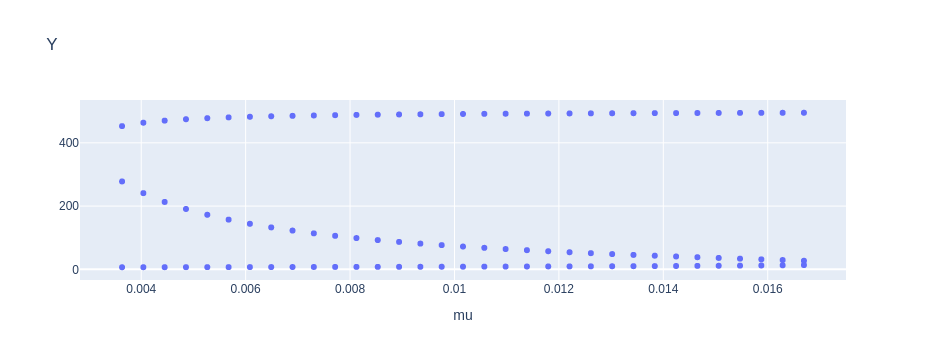

In [59]:

xs=[]
ys=[]
mus_bif = []
for cur_mu, sols in list(filtered_solutions_by_mu.items()):
    for x,y in sols:
        if y!=0:# (σ/δ, 0) - решение, не зависящее от mu
            mus_bif.append(cur_mu)
            xs.append(float(x.as_real_imag()[0]))
            ys.append(float(y.as_real_imag()[0]))
            
fig = go.Figure()
fig.add_trace(go.Scatter(x=mus_bif, y=ys, mode='markers', name = "x_im_parts"))
# fig.add_trace(go.Scatter(x=mus_for_im, y=y_im_parts, mode='markers', name = "y_im_parts"))
fig.update_layout(title="Y")
fig.update_layout(xaxis={"title": "mu"})